As we approach an attempt at predictive analysis for our data, we have two sets to consider: patterns and yarn. It will be important to examine both, especially as we've pulled our yarn data based on the number of projects done with it rather than how many people have it "stashed."

To stash yarn is to purchase it and have it on-hand without having a specific project in mind or planned. Ravelry users have the ability to add yarn to their "stash" tracked on the site without assigning it to any sort of project. It could be the case that while the yarns we've pulled are the most popular for people to actually *use* - it could be the case that there are yarns out there that are more popular overall when you account for impulse purchases.

Additionally, a restriction of our data is that we cannot further drill down to color or color-family popularity. The yarn data we are able to access is related to a general yarn product, which is then available in various colors. While users can indicate the name of the color they have used in a project or in their stash, this data is stored on an individual level rather than aggregated in any meaningful way for scraping purposes.

To the same degree, users are also prone to purchasing or simply adding free, downloadable patterns to their pattern-library without any clear idea of when/if they'll create the pattern's project. We do not have an accessible way to aggregate the data on how many users have a particular pattern in their library, regardless of how many have created a project under the pattern's listing in the Ravelry database. As well, if a pattern is available via multiple sources, this would give us an incomplete picture of that pattern's success.

With all of this in mind, our pull of yarn data is directly related to the number of projects done with the yarn, which relates us back to patterns. A project only exists with the application of yarn and patterns, after all.

This analysis will create a hypothetical data point for a pattern and its important traits, then separately do the same for yarn. The traits of the pattern and yarn will coordinate with one another, to mimic the hypothetical situation that I'm choosing to create my own pattern using a yarn I've hand-dyed for my business - as a means to cross-promote both. Popular patterns generate interest and income for the yarn they recommend, often even if the user ultimately doesn't decide to make the pattern. This is a great real-world scenario for a hand-dyed yarn business!

All null values in columns we are using for analysis will simply be dropped, as they are of a low enough number as to not cause issues with the overall analysis.

For the purposes of this analysis, we'll be mapping the values for Yarn Weight to numerical values as follows.

For Yarn Data:
- Aran : 4
- Bulky : 5
- DK : 3
- Fingering : 1
- Lace : 0
- Light Fingering : 1
- Sport : 2
- Super Bulky : 6
- Worsted : 4

For Pattern Data:
- Any gauge : 8
- Aran : 4
- Aran / Worsted : 4
- Bulky : 5
- Cobweb : 0
- DK : 3
- DK / Sport : 3
- Fingering : 1
- Jumbo : 7
- Lace : 0
- Light Fingering : 1
- None Specified : 8
- Sport : 2
- Super Bulky : 6
- Thread : 0
- Worsted : 4

These roughly follow the sizing guidelines used by the Craft Yarn Council, which can be found here (https://www.craftyarncouncil.com/standards/yarn-weight-system).

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Yarn Analysis

In [9]:
yarnlocation = 'TopRavelryYarnList.csv'
dfyarn = pd.read_csv(yarnlocation)

dfyarn.dropna(inplace = True)

dfyarn['Yarn Weight'] = dfyarn['Yarn Weight'].map({'Aran' : 4,'Bulky' : 5,'DK' : 3,'Fingering' : 1,
                                                   'Lace' : 0,'Light Fingering' : 1,'Sport' : 2,
                                                   'Super Bulky' : 6,'Worsted' : 4})

dfyarn['Machine Washable'] = dfyarn['Machine Washable'].map({True: 1, False: 0})

dfyarn.drop(columns=['Yarn ID', 'Discontinued'], inplace = True)

dfyarn.head(10)

,Grams,Machine Washable,Average Rating,Yardage,Yarn Weight
0,100.0,0,4.73,210.0,4
2,100.0,1,4.73,440.0,1
3,150.0,1,4.71,574.0,1
4,150.0,1,4.69,510.0,1
8,146.0,1,4.66,405.0,1
9,50.0,0,4.52,470.0,0
10,50.0,0,4.67,175.0,1
11,100.0,1,4.43,462.0,1
12,100.0,1,4.54,435.0,1
13,300.0,1,4.78,1722.0,0


In [11]:
dfyarn.describe()

,Grams,Machine Washable,Average Rating,Yardage,Yarn Weight
count,960.000000,960.000000,960.000000,960.000000,960.000000
mean,105.181250,0.588542,4.724312,407.228125,1.579167
std,33.773497,0.492354,0.194020,190.410136,1.173208
min,12.000000,0.000000,3.110000,45.000000,0.000000
25%,100.000000,0.000000,4.647500,325.000000,1.000000
50%,100.000000,1.000000,4.770000,420.000000,1.000000
75%,113.000000,1.000000,4.850000,460.000000,2.000000
max,454.000000,1.000000,5.000000,2500.000000,6.000000


In [16]:
dfyarn.groupby('Yarn Weight').mean()

,Grams,Machine Washable,Average Rating,Yardage
Yarn Weight,,,,
0,102.163265,0.183673,4.671837,828.000000
1,103.889236,0.656786,4.738658,437.585023
2,106.421875,0.515625,4.668125,332.250000
3,104.881188,0.534653,4.759901,263.900990
4,108.287356,0.482759,4.674023,219.379310
5,150.000000,0.416667,4.587500,195.916667
6,125.000000,0.166667,4.623333,86.666667


What I gather from the charts above is that fingering yarn is vastly more common, to the point that the mean skews towards 1 even when the max value is 6. It's also most commonly machine washable - which is a fantastic feature for ease-of-wear for a (very likely) wool garment.

((As a note, types of wool are by and far the most commonly used in the hand-dyed yarn industry. Wool is easy to dye, as any pigment that will stain the fiber can generally be set simply by boiling the fiber in acidic water. Certain dyes may fade, however, so use of professional grade dyes are still important, but the byproduct exhaust water will typically carry very little residue from the dye chemical itself. It is simply acidic water, which can be made "safer" as-needed by adding baking soda. The acidity is achieved through the use of household vinegar or citric acid.))

It is of no surprise to Shayla that yarns in the Weight 1 category would most commonly be washable, as this weight of yarn is specifically made for a hard-wearing item: socks!

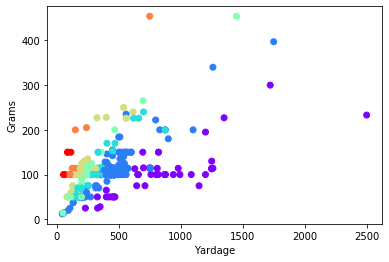

In [21]:
plt.xlabel('Yardage')
plt.ylabel('Grams')
plt.scatter(dfyarn['Yardage'], dfyarn['Grams'], c=dfyarn['Yarn Weight'], cmap='rainbow')

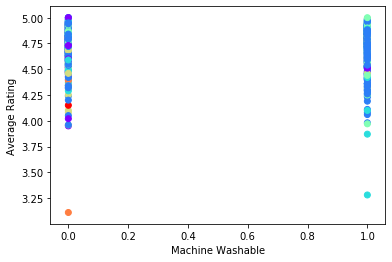

In [22]:
plt.xlabel('Machine Washable')
plt.ylabel('Average Rating')
plt.scatter(dfyarn['Machine Washable'], dfyarn['Average Rating'], c=dfyarn['Yarn Weight'], cmap='rainbow')

#Not terribly exciting, but this shows our additional dimensions for analysis

In [23]:
X = dfyarn.drop(['Yarn Weight'], axis=1)
kmeans = KMeans(n_clusters=7)

y = dfyarn['Yarn Weight'].copy()

kmeans.fit(X)

print(kmeans.cluster_centers_)

[[1.02813644e+02 6.53910150e-01 4.74121464e+00 4.29081531e+02]
 [1.49566667e+02 3.66666667e-01 4.66033333e+00 8.17800000e+02]
 [3.10000000e+02 6.66666667e-01 4.70666667e+00 1.99066667e+03]
 [7.07301587e+01 4.44444444e-01 4.63079365e+00 1.29492063e+02]
 [1.75000000e+02 1.53846154e-01 4.65153846e+00 1.23484615e+03]
 [9.99796954e+01 5.07614213e-01 4.73192893e+00 2.46736041e+02]
 [1.38471698e+02 5.47169811e-01 4.67056604e+00 5.61075472e+02]]


In [47]:
print(kmeans.fit(X))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


Text(0, 0.5, 'Grams')

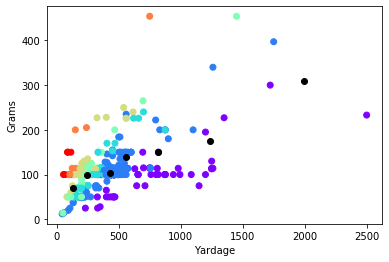

In [25]:
#the original scatterplot
plt.scatter(dfyarn['Yardage'], dfyarn['Grams'], c=dfyarn['Yarn Weight'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('Yardage')
plt.ylabel('Grams')

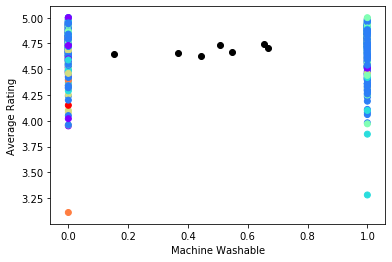

In [28]:
plt.xlabel('Machine Washable')
plt.ylabel('Average Rating')
plt.scatter(dfyarn['Machine Washable'], dfyarn['Average Rating'], c=dfyarn['Yarn Weight'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

In [29]:
dfyarn['clusters'] = kmeans.labels_
dfyarn.head()

,Grams,Machine Washable,Average Rating,Yardage,Yarn Weight,clusters
0,100.0,0,4.73,210.0,4,5
2,100.0,1,4.73,440.0,1,0
3,150.0,1,4.71,574.0,1,6
4,150.0,1,4.69,510.0,1,6
8,146.0,1,4.66,405.0,1,0


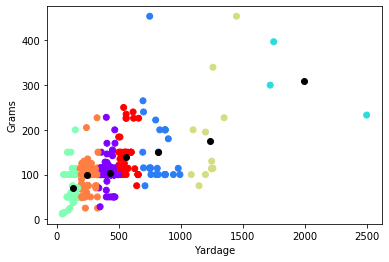

In [30]:
#the original scatterplot, but now we're basing coloration on the predicted yarn weight cluster
plt.xlabel('Yardage')
plt.ylabel('Grams')
plt.scatter(dfyarn['Yardage'], dfyarn['Grams'], c=dfyarn['clusters'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,0], c='black')

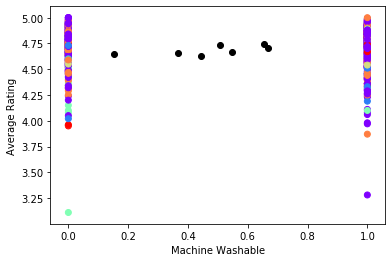

In [31]:
plt.xlabel('Machine Washable')
plt.ylabel('Average Rating')
plt.scatter(dfyarn['Machine Washable'], dfyarn['Average Rating'], c=dfyarn['clusters'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

From everything observed up to this point, based on the clustering that kmeans gave us... we aren't going to really be able to gain any meaningful insight from further analysis of the yarn data, at least in this form. But, that's not necessarily any sort of failure! We still have pattern analysis ahead.

# Pattern Analysis

In [10]:
patternlocation = 'TopRavelryPatternList.csv'
dfpattern = pd.read_csv(patternlocation)

dfpattern['Yarn Weight'] = dfpattern['Yarn Weight'].map({'Any gauge' : 8,'Aran' : 4,'Aran / Worsted' : 4,
                                                         'Bulky' : 5,'Cobweb' : 0,'DK' : 3,'DK / Sport' : 3,
                                                         'Fingering' : 1,'Jumbo' : 7,'Lace' : 0,
                                                         'Light Fingering' : 1,'None Specified' : 8,
                                                         'Sport' : 2,'Super Bulky' : 6,'Thread' : 0,
                                                         'Worsted' : 4})

dfpattern['Downloadable'] = dfpattern['Downloadable'].map({True: 1, False: 0})

dfpattern['Free'] = dfpattern['Free'].map({True: 1, False: 0})

dfpattern['Craft'] = dfpattern['Craft'].map({'Knitting': 0, 'Crochet': 1, 
                                             'Loom Knitting': 2, 'Machine Knitting': 3})

dfpattern.drop(columns=['Category', 'Publish Date', 'Pattern ID'], inplace = True)

dfpattern.head()

,Average Difficulty,Average Rating,Total Projects,Downloadable,Free,Price,Min Yardage,Max Yardage,Yarn Weight,Craft
0,2.332074,4.628990,28663,1,1,0.0,350.0,400.0,1,0
1,2.534649,4.804386,20206,1,0,1.0,0.0,0.0,1,0
2,1.639235,4.711647,20770,1,1,0.0,70.0,170.0,4,0
3,2.297305,4.726276,14761,1,1,0.0,280.0,1800.0,4,0
4,1.506778,4.639974,21161,1,1,0.0,155.0,415.0,1,0


In [32]:
dfpattern.describe()

,Average Difficulty,Average Rating,Total Projects,Downloadable,Free,Price,Min Yardage,Max Yardage,Yarn Weight,Craft
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,2.858645,4.631898,596.232200,0.940900,0.428200,4.440015,463.96130,564.693000,2.815300,0.145000
std,0.967489,0.346902,1446.604108,0.235824,0.494843,18.182903,548.94033,786.322678,1.784238,0.359149
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.156984,4.526316,94.000000,1.000000,0.000000,0.000000,100.00000,0.000000,1.000000,0.000000
50%,2.718065,4.670886,210.000000,1.000000,0.000000,3.000000,300.00000,250.000000,3.000000,0.000000
75%,3.444635,4.800000,526.500000,1.000000,1.000000,6.000000,700.00000,814.250000,4.000000,0.000000
max,7.423729,5.000000,31734.000000,1.000000,1.000000,680.000000,9660.00000,14100.000000,8.000000,3.000000


In [33]:
dfpattern.groupby("Yarn Weight").mean()

,Average Difficulty,Average Rating,Total Projects,Downloadable,Free,Price,Min Yardage,Max Yardage,Craft
Yarn Weight,,,,,,,,,
0,3.499298,4.686551,635.791809,0.928328,0.300341,7.394915,712.764505,671.870307,0.215017
1,3.073329,4.655380,584.771230,0.928377,0.313690,5.588114,568.357812,655.670898,0.054095
2,3.097307,4.647231,483.930423,0.938608,0.360164,5.889727,580.148704,715.582538,0.128240
3,2.896110,4.643195,494.018326,0.943189,0.403787,4.320599,468.299939,648.946243,0.153329
4,2.671326,4.606691,682.571866,0.959469,0.544959,3.008822,376.194823,466.378747,0.228542
5,2.309910,4.592057,621.064583,0.958333,0.570833,4.557375,315.395833,394.641667,0.114583
6,2.049896,4.546655,509.475352,0.954225,0.651408,1.694225,214.126761,210.985915,0.169014
7,2.026347,4.579478,137.400000,1.000000,1.000000,0.000000,190.800000,290.400000,0.000000
8,2.588785,4.613798,712.315789,0.866873,0.517028,2.630898,125.563467,227.622291,0.275542


Now *this* is where our analysis can take place, as we have a lot of very interesting kinds of data to run through. However... I don't feel we have any true pre-existing clustering that we necessarily want or need kmeans to attempt to predict.

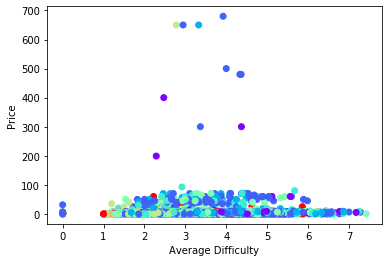

In [35]:
plt.xlabel('Average Difficulty')
plt.ylabel('Price')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Price'], c=dfpattern['Yarn Weight'], cmap='rainbow')

At this point, we hit the realization that the price stored that we pulled was not in USD. While there is, in fact, a field that indicates currency used, the entries we examined never had values entered, so at this point evaluation of price isn't particularly meaningful considering we're not working in the same units across the board. At a later time, it would be valuable to pull more of this information, either converting non-USD values  or dropping them so that our units are consistent. But the existance of prices near '700' could throw things off in examinations like std. dev.

In [37]:
dfpattern.drop(columns=['Price'], inplace = True)

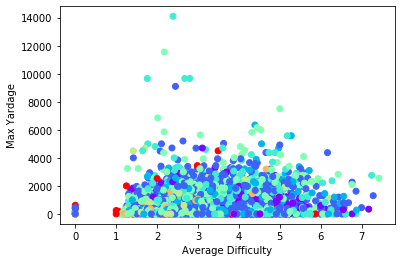

In [39]:
plt.xlabel('Average Difficulty')
plt.ylabel('Max Yardage')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Max Yardage'], c=dfpattern['Yarn Weight'], cmap='rainbow')

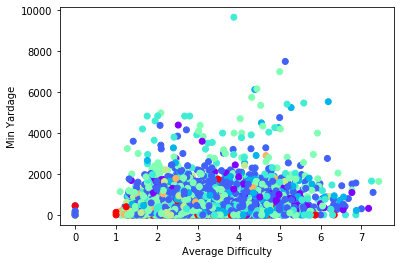

In [46]:
plt.xlabel('Average Difficulty')
plt.ylabel('Min Yardage')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Min Yardage'], c=dfpattern['Yarn Weight'], cmap='rainbow')

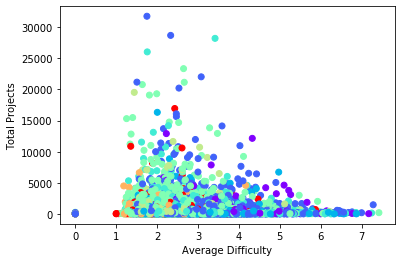

In [44]:
plt.xlabel('Average Difficulty')
plt.ylabel('Total Projects')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Total Projects'], c=dfpattern['Yarn Weight'], cmap='rainbow')

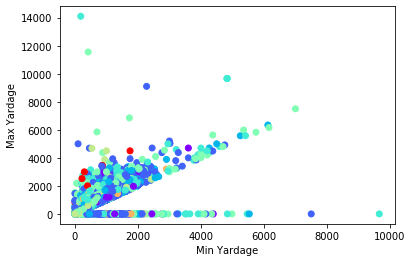

In [45]:
plt.xlabel('Min Yardage')
plt.ylabel('Max Yardage')
plt.scatter(dfpattern['Min Yardage'], dfpattern['Max Yardage'], c=dfpattern['Yarn Weight'], cmap='rainbow')

In [48]:
X = dfpattern.drop(['Yarn Weight'], axis=1)
kmeans = KMeans(n_clusters=9)

y = dfpattern['Yarn Weight'].copy()

kmeans.fit(X)

print(kmeans.cluster_centers_)

[[2.35806600e+00 4.53553351e+00 1.25340278e+04 9.44444444e-01
  7.50000000e-01 2.80750000e+02 3.35944444e+02 8.32667268e-17]
 [2.69745297e+00 4.63004035e+00 2.32202941e+02 9.39154412e-01
  5.05147059e-01 2.18031618e+02 1.62936949e+02 1.80330882e-01]
 [3.52709742e+00 4.70753635e+00 2.94945561e+02 9.42211055e-01
  1.04690117e-01 1.20791792e+03 2.03022613e+03 8.79396985e-02]
 [2.50420127e+00 4.54408693e+00 6.87729897e+03 9.69072165e-01
  6.70103093e-01 3.70835052e+02 4.39546392e+02 6.18556701e-02]
 [3.10813123e+00 4.67022277e+00 2.46289621e+02 9.51450893e-01
  2.36049107e-01 7.52978795e+02 9.23298549e+02 1.03236607e-01]
 [2.67038880e+00 4.52529079e+00 3.32539506e+03 9.29012346e-01
  5.89506173e-01 3.87074074e+02 3.85827160e+02 6.79012346e-02]
 [3.45608461e+00 4.75071752e+00 4.77129630e+02 8.88888889e-01
  5.00000000e-01 3.89570370e+03 5.15711111e+03 6.85185185e-01]
 [2.19820154e+00 4.54458904e+00 2.31623846e+04 9.23076923e-01
  7.69230769e-01 2.45076923e+02 1.79923077e+02 0.00000000e+00]


0: Average Difficulty
1: Average Rating
2: Total Projects
3: Downloadable
4: Free
5: Price
6: Min Yardage
7: Max Yardage
8: Craft

For ease of sorting out how to plot using our column values!

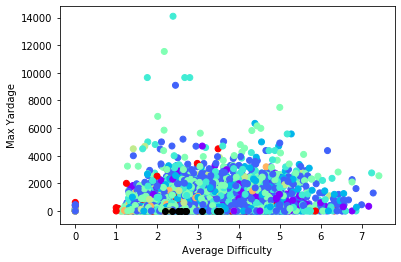

In [49]:
plt.xlabel('Average Difficulty')
plt.ylabel('Max Yardage')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Max Yardage'], c=dfpattern['Yarn Weight'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,7], c='black')

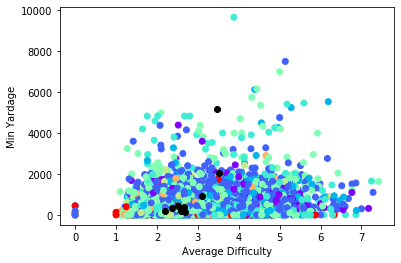

In [50]:
plt.xlabel('Average Difficulty')
plt.ylabel('Min Yardage')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Min Yardage'], c=dfpattern['Yarn Weight'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,6], c='black')

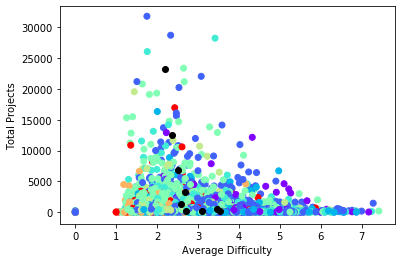

In [51]:
plt.xlabel('Average Difficulty')
plt.ylabel('Total Projects')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Total Projects'], c=dfpattern['Yarn Weight'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='black')

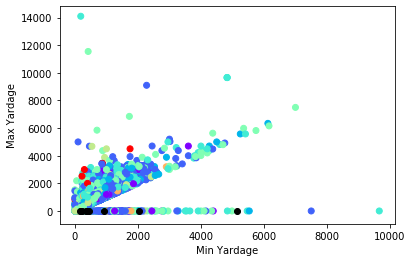

In [52]:
plt.xlabel('Min Yardage')
plt.ylabel('Max Yardage')
plt.scatter(dfpattern['Min Yardage'], dfpattern['Max Yardage'], c=dfpattern['Yarn Weight'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,6], kmeans.cluster_centers_[:,7], c='black')

In [53]:
dfpattern['clusters'] = kmeans.labels_
dfpattern.head()

,Average Difficulty,Average Rating,Total Projects,Downloadable,Free,Min Yardage,Max Yardage,Yarn Weight,Craft,clusters
0,2.332074,4.628990,28663,1,1,350.0,400.0,1,0,7
1,2.534649,4.804386,20206,1,0,0.0,0.0,1,0,7
2,1.639235,4.711647,20770,1,1,70.0,170.0,4,0,7
3,2.297305,4.726276,14761,1,1,280.0,1800.0,4,0,0
4,1.506778,4.639974,21161,1,1,155.0,415.0,1,0,7


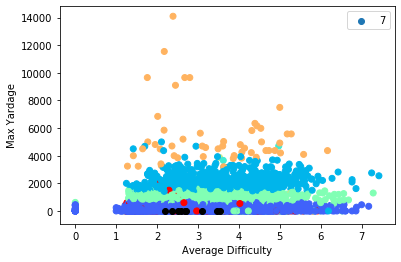

In [67]:
plt.xlabel('Average Difficulty')
plt.ylabel('Max Yardage')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Max Yardage'], c=dfpattern['clusters'], cmap='rainbow')
#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,7], c='black')

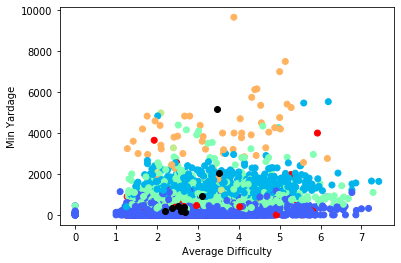

In [55]:
plt.xlabel('Average Difficulty')
plt.ylabel('Min Yardage')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Min Yardage'], c=dfpattern['clusters'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,6], c='black')

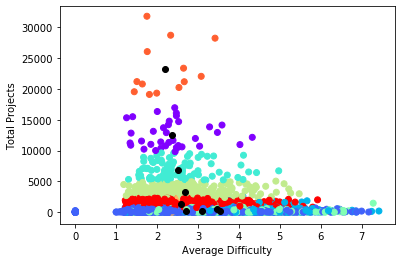

In [56]:
plt.xlabel('Average Difficulty')
plt.ylabel('Total Projects')
plt.scatter(dfpattern['Average Difficulty'], dfpattern['Total Projects'], c=dfpattern['clusters'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='black')

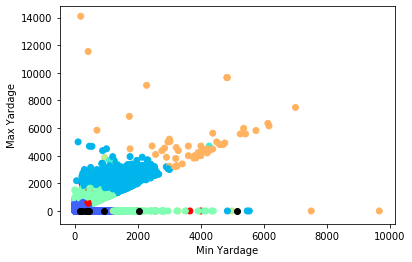

In [57]:
plt.xlabel('Min Yardage')
plt.ylabel('Max Yardage')
plt.scatter(dfpattern['Min Yardage'], dfpattern['Max Yardage'], c=dfpattern['clusters'], cmap='rainbow')

#plots the centroids kmeans created
plt.scatter(kmeans.cluster_centers_[:,6], kmeans.cluster_centers_[:,7], c='black')

To some degree, it's interesting to see the clustering assignments created by kmeans on this data, as there is no clear-cut existing category - other than yarn weight - that we could necessarily use and compare results to. However, looking at the categories generated, I am highly interested in knowing more about the centroid generated for a specific category, which is the light blue-green color.

Attempts to generate a clear legend of the categories and determine which centroid matches the data did not prove fruitful. This category, however, seems to encompass a solid mid-line of successful patterns in all metrics.

Based on the graphs, I believe the centroid for this category is the fourth generated:
[2.50420127e+00 4.54408693e+00 6.87729897e+03 9.69072165e-01 6.70103093e-01 3.70835052e+02 4.39546392e+02 6.18556701e-02]

Giving us values of...
- Average Difficulty = 2.5
- Average Rating = 4.5
- Downloadable ~ 1 (True)
- Free ~0.67, closer to our '1' for True, but it corroborates our Tableau findings that the free/not free, but downloadable, split is fairly close to 50/50
- Min Yardage = 371
- Max Yardage = 440
- Craft ~0.06, closest to our '0' for Knitting

I would say that this ideally lays out that a simple pattern, available for download from Ravelry, made for Knitters, and uses less than a full skein of weight 1 yarn (or a relatively low amount of other weights) is going to be a sweet spot to hit for Ravelry users.

However, our best analysis seems to be coming out of our use of Tableau.